In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
%matplotlib notebook

In [2]:
cameras_file = os.path.join("../Desktop/Archive", "speed-camera-locations.csv")
cameras_file = pd.read_csv(cameras_file)
violations_file = os.path.join("../Desktop/Archive","red-light-camera-violations.csv")
violations_file = pd.read_csv(violations_file)

In [3]:
speed_cam_locs_df = pd.DataFrame(cameras_file)
speed_cam_locs_df = speed_cam_locs_df.dropna(how="any")
red_violations_df = pd.DataFrame(violations_file)
red_violations_df = red_violations_df.dropna(how="any")

In [4]:
speed_cam_locs_df.head()

,ADDRESS,FIRST APPROACH,SECOND APPROACH,GO-LIVE DATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
1,6125 N Cicero Ave (Speed Camera),NB,SB,03/17/2014,41.992119,-87.748477,"{'latitude': '41.9921194114274', 'human_addres...",28,22532,12,782,38
2,5454 W Irving Park (Speed Camera),EB,WB,11/10/2013,41.953330,-87.764267,"{'latitude': '41.95332954454448', 'human_addre...",25,22618,15,260,19
6,732 N Pulaski Rd (Speed Camera),NB,SB,03/24/2014,41.894503,-87.726205,"{'latitude': '41.89450330881178', 'human_addre...",11,21572,24,99,45
7,4042 W Roosevelt Rd (Speed Camera),EB,WB,09/09/2014,41.866257,-87.726879,"{'latitude': '41.866257378192785', 'human_addr...",36,21572,30,98,14
10,2900 W Ogden Ave (Speed Camera),EB,WB,10/17/2013,41.860408,-87.698672,"{'latitude': '41.86040786445197', 'human_addre...",36,21569,30,132,14


In [5]:
speed_cam_locs_df.columns

Index(['ADDRESS', 'FIRST APPROACH', 'SECOND APPROACH', 'GO-LIVE DATE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'Historical Wards 2003-2015',
       'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards'],
      dtype='object')

In [6]:
cams_per_ward = pd.DataFrame(speed_cam_locs_df.groupby("Wards")["ADDRESS"].count())
cams_per_ward

,ADDRESS
Wards,
1,2
3,3
4,4
7,1
8,2
10,1
13,1
14,2
16,1


In [7]:
red_violations_df.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,111TH AND HALSTED,2424.0,800 W 111TH ST,2019-11-21T00:00:00.000,1,1.172945e+06,1.831283e+06,41.692465,-87.642441,"{'latitude': '41.692465363421874', 'human_addr...",45.0,21861.0,74.0,315.0,22.0
1,111TH AND HALSTED,2422.0,11100 S HALSTED ST,2019-11-21T00:00:00.000,7,1.172924e+06,1.831209e+06,41.692263,-87.642523,"{'latitude': '41.692263123425136', 'human_addr...",45.0,21861.0,74.0,663.0,22.0
2,119TH AND HALSTED,2402.0,11900 S HALSTED,2019-11-21T00:00:00.000,12,1.173095e+06,1.825911e+06,41.677721,-87.642052,"{'latitude': '41.67772082924762', 'human_addre...",45.0,21861.0,50.0,662.0,22.0
3,119TH AND HALSTED,2404.0,800 W 119TH STREET,2019-11-21T00:00:00.000,5,1.173111e+06,1.825985e+06,41.677923,-87.641990,"{'latitude': '41.677923389134385', 'human_addr...",45.0,21861.0,50.0,642.0,22.0
5,31ST ST AND MARTIN LUTHER KING DRIVE,2123.0,400 E 31ST STREET,2019-11-21T00:00:00.000,1,1.179438e+06,1.884566e+06,41.838534,-87.617046,"{'latitude': '41.838534018118914', 'human_addr...",1.0,21194.0,1.0,560.0,10.0


In [8]:
red_violations_df.columns

Index(['INTERSECTION', 'CAMERA ID', 'ADDRESS', 'VIOLATION DATE', 'VIOLATIONS',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'Historical Wards 2003-2015', 'Zip Codes', 'Community Areas',
       'Census Tracts', 'Wards'],
      dtype='object')

In [9]:
violations_per_ward = pd.DataFrame(red_violations_df.groupby("Wards")["VIOLATIONS"].sum())
violations_per_ward.head()

,VIOLATIONS
Wards,
1.0,33954
2.0,25678
3.0,34321
4.0,30201
5.0,21366


In [10]:
merge_df = pd.merge(cams_per_ward, violations_per_ward, on="Wards")
merge_df = merge_df.rename(columns={
    "ADDRESS": "Number of Speed Cams per Ward",
    "VIOLATIONS": "Number of Red Light Violations per Ward"
})
merge_df

,Number of Speed Cams per Ward,Number of Red Light Violations per Ward
Wards,,
1,2,33954
3,3,34321
4,4,30201
7,1,56300
8,2,40841
10,1,6862
13,1,163172
14,2,43908
16,1,61429


In [11]:
wards = [
1,
3,
4,
7,
8,
10,
13,
14,
16,
17,
18,
19,
20,
21,
23,
24,
26,
27,
29,
31,
32,
33,
35,
38,
39,
40,
41,
42,
43,
44,
45,
46,
48,
49,
50
]

In [12]:
def to_linear_regress(x, y, weight, arrangement, cmap):
    pearson_r = round(st.pearsonr(x, y)[0],2)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    plt.scatter(x, y, s=weight, c=arrangement, cmap=cmap)
    plt.plot(x,regress_values,"r-")
    print(f"correlation coefficient : {pearson_r}")
    print(f"pvalue: {round(pvalue,2)}")
    return line_eq

In [13]:
def to_annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=13,color="red")

In [14]:
merge_df["Ward Number"] = wards
merge_df.head()

,Number of Speed Cams per Ward,Number of Red Light Violations per Ward,Ward Number
Wards,,,
1,2,33954,1
3,3,34321,3
4,4,30201,4
7,1,56300,7
8,2,40841,8


In [29]:
cameras_file = os.path.join("../Desktop/Archive", "ward_offices_locs_alt.csv")
ward_offices_df = pd.read_csv(cameras_file)
merge_df = pd.merge(merge_df, ward_offices_df, on="Ward Number")
merge_df

,Number of Speed Cams per Ward,Number of Red Light Violations per Ward,Ward Number,Latitude_x,Longitude_x,Neighborhoods_x,Navigator_x,Latitude_y,Longitude_y,Neighborhoods_y,Navigator_y,Latitude,Longitude,Neighborhoods,Navigator
0,2,33954,1,41.918127,-87.687821,"Wicker Park, West Town, Ukranian Village, Loga...","N Side, W and Near W Side",41.918127,-87.687821,"Wicker Park, West Town, Ukranian Village, Loga...","N Side, W and Near W Side",41.918127,-87.687821,"Wicker Park, West Town, Ukranian Village, Loga...","N Side, W and Near W Side"
1,3,34321,3,41.804552,-87.626387,"Hyde Park, Bronzeville, Fuller Park and Grand...",Near S Side,41.804552,-87.626387,"Hyde Park, Bronzeville, Fuller Park and Grand...",Near S Side,41.804552,-87.626387,"Hyde Park, Bronzeville, Fuller Park and Grand...",Near S Side
2,4,30201,4,41.885555,-87.631870,"South Loop, Museum Campus, Douglas, Grand Boul...",S Side,41.885555,-87.631870,"South Loop, Museum Campus, Douglas, Grand Boul...",S Side,41.885555,-87.631870,"South Loop, Museum Campus, Douglas, Grand Boul...",S Side
3,1,56300,7,41.723191,-87.568378,"Calumet Heights, Pill Hill, South Chicago, Sou...",Far S Side,41.723191,-87.568378,"Calumet Heights, Pill Hill, South Chicago, Sou...",Far S Side,41.723191,-87.568378,"Calumet Heights, Pill Hill, South Chicago, Sou...",Far S Side
4,2,40841,8,41.750322,-87.603073,"Pullman, Avalon Park, South Shore, Burnside, C...",Far S Side,41.750322,-87.603073,"Pullman, Avalon Park, South Shore, Burnside, C...",Far S Side,41.750322,-87.603073,"Pullman, Avalon Park, South Shore, Burnside, C...",Far S Side
5,1,6862,10,41.706005,-87.535526,"Hegewisch, East Side, South Deering, Jeffery M...",Far S Side and S Side,41.706005,-87.535526,"Hegewisch, East Side, South Deering, Jeffery M...",Far S Side and S Side,41.706005,-87.535526,"Hegewisch, East Side, South Deering, Jeffery M...",Far S Side and S Side
6,1,163172,13,41.776442,-87.722318,"West Lawn, Clearing, West Elsdon, Garfield Ridge",SW Side,41.776442,-87.722318,"West Lawn, Clearing, West Elsdon, Garfield Ridge",SW Side,41.776442,-87.722318,"West Lawn, Clearing, West Elsdon, Garfield Ridge",SW Side
7,2,43908,14,41.803364,-87.690833,"Far West Side, Archer Heights, Garfield Ridge,...",SW Side,41.803364,-87.690833,"Far West Side, Archer Heights, Garfield Ridge,...",SW Side,41.803364,-87.690833,"Far West Side, Archer Heights, Garfield Ridge,...",SW Side
8,1,61429,16,41.797053,-87.664397,"Chicago Lawn, West Englewood, Gage Park",SW Side,41.797053,-87.664397,"Chicago Lawn, West Englewood, Gage Park",SW Side,41.797053,-87.664397,"Chicago Lawn, West Englewood, Gage Park",SW Side
9,1,50797,17,41.752220,87.657918,"Marquette Park, Gresham, West Englewood, Chica...",SW Side,41.752220,87.657918,"Marquette Park, Gresham, West Englewood, Chica...",SW Side,41.752220,87.657918,"Marquette Park, Gresham, West Englewood, Chica...",SW Side


<IPython.core.display.Javascript object>


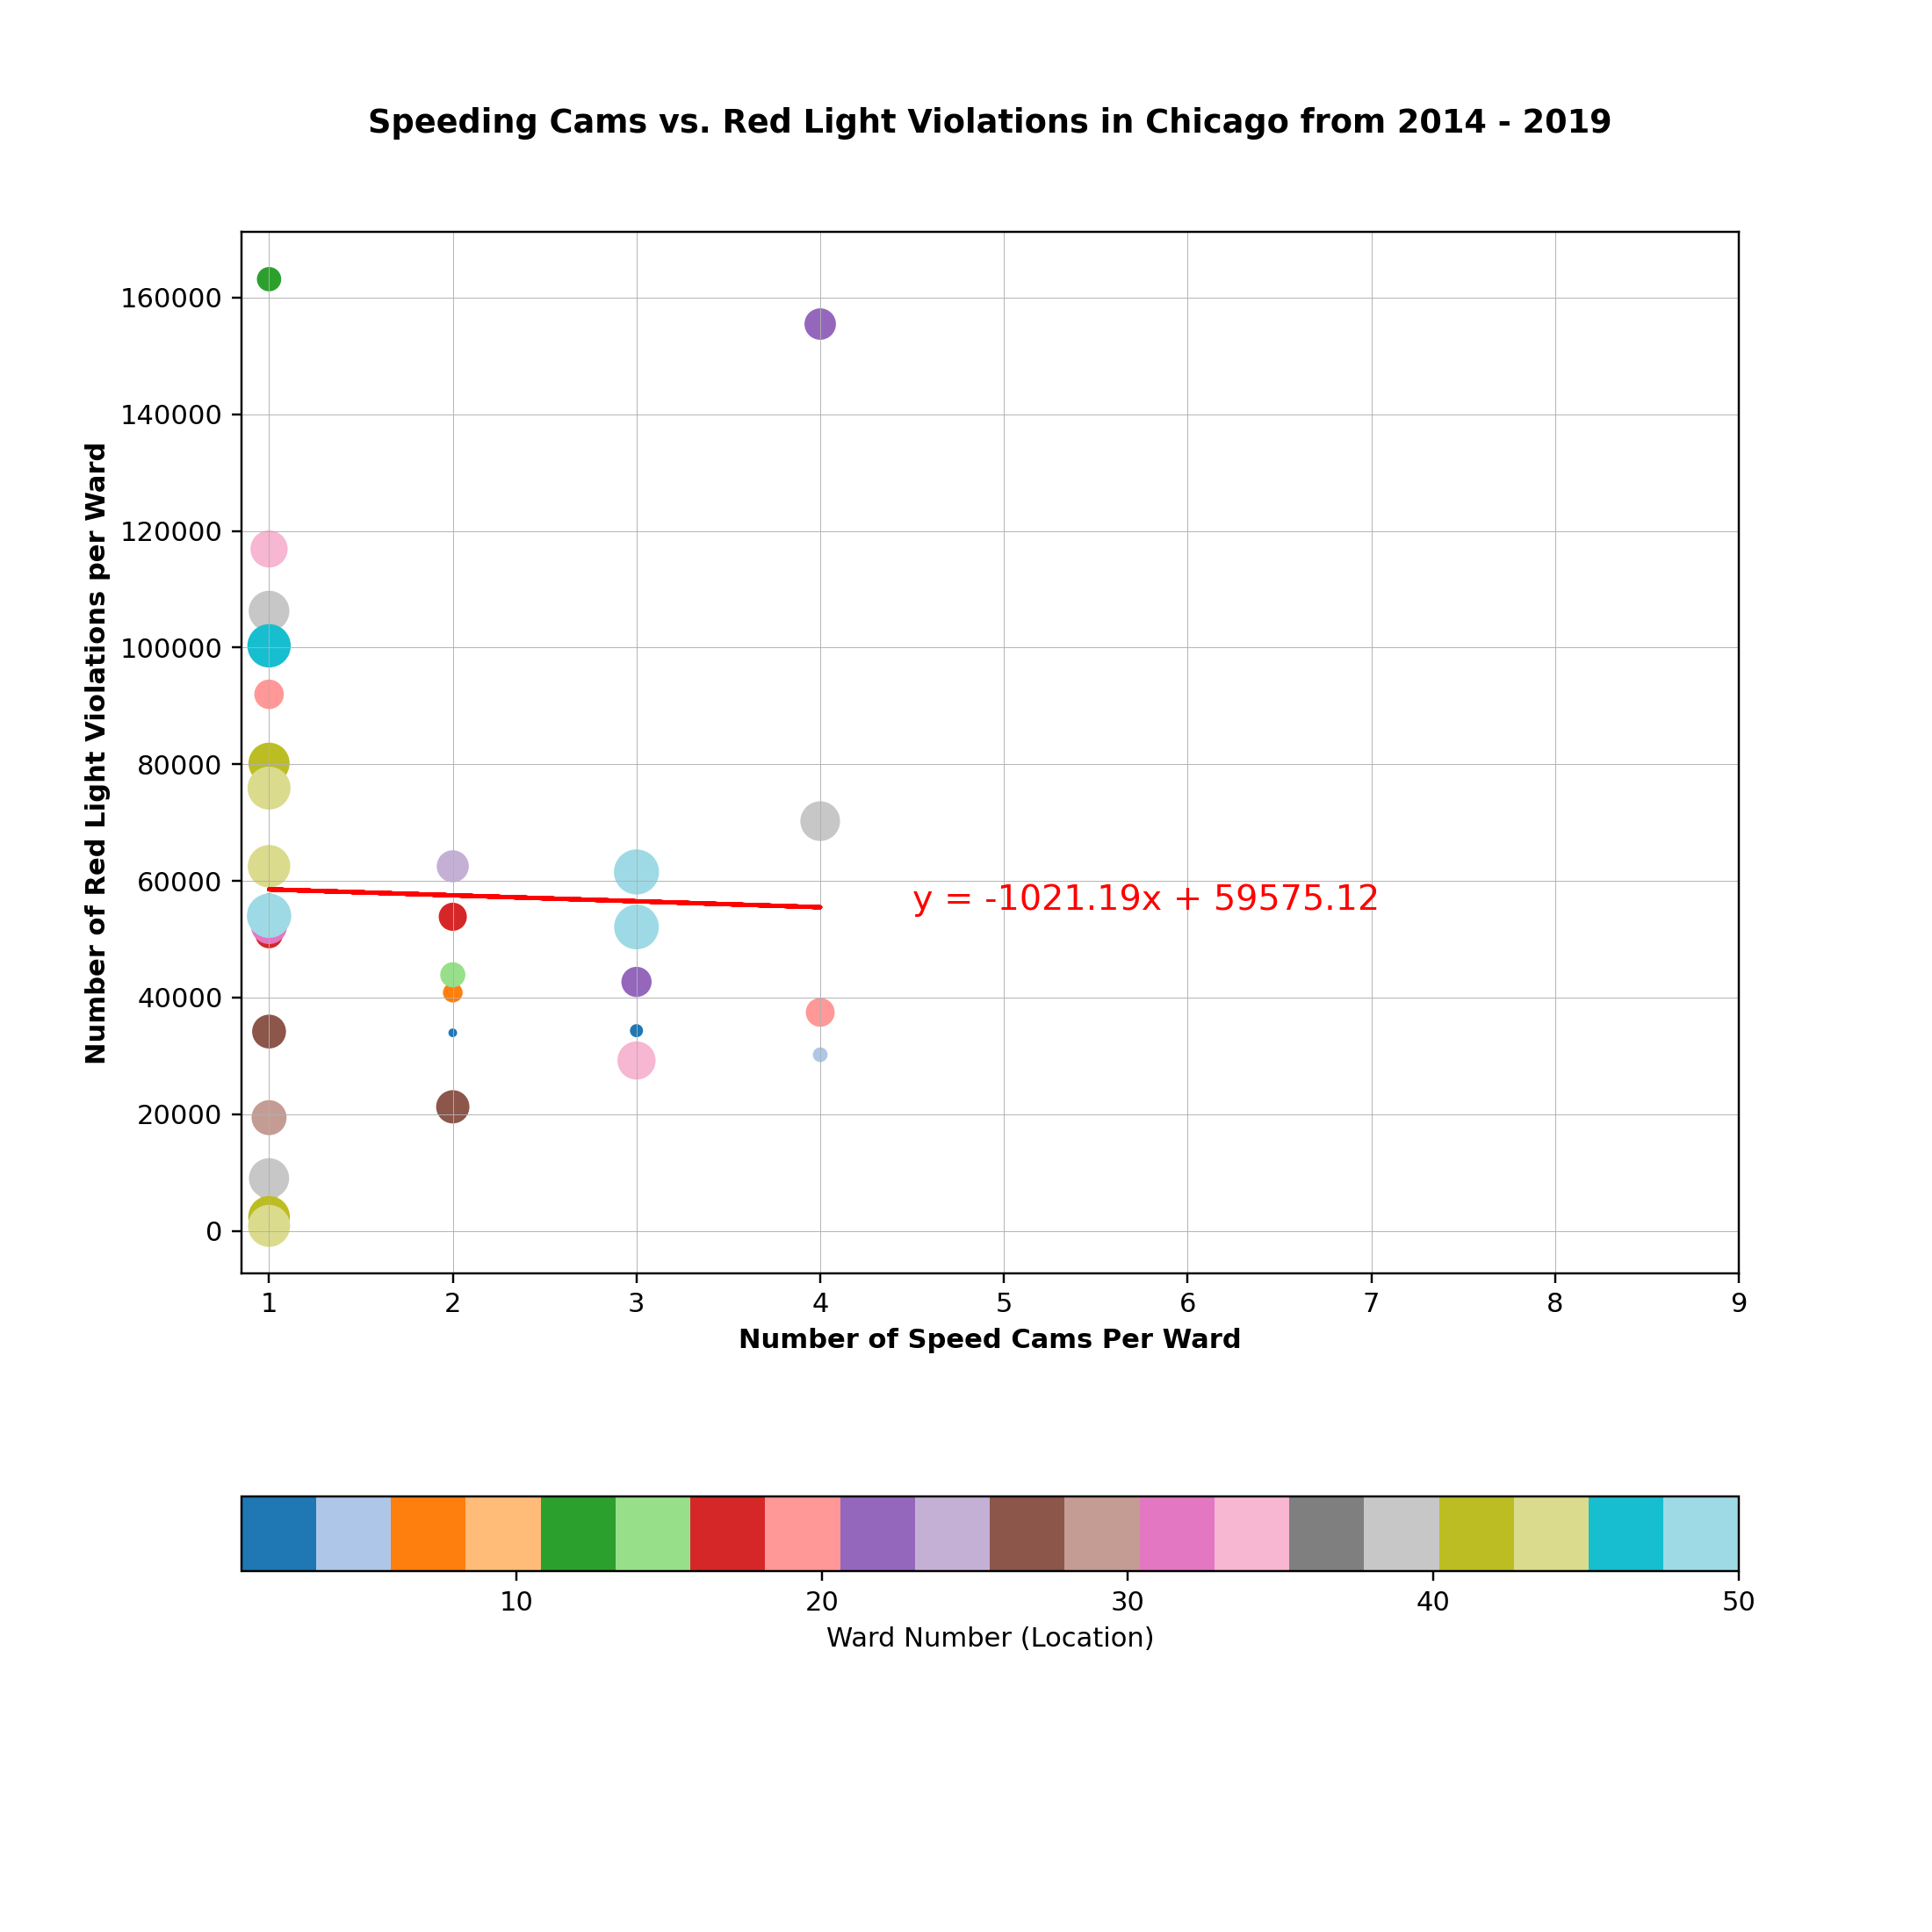

correlation coefficient : -0.03
pvalue: 0.87


In [25]:
weight= merge_df["Ward Number"]*5
arrangement = merge_df["Ward Number"]
np.arange(len(merge_df["Ward Number"]))
cmap='tab20' 
line = to_linear_regress(merge_df["Number of Speed Cams per Ward"], merge_df["Number of Red Light Violations per Ward"], weight, arrangement, cmap)
to_annotate(line, 4.5, 55000)
plt.xticks(np.arange(1, 10, 1))
plt.xlabel("Number of Speed Cams Per Ward", fontweight="bold")
plt.ylabel("Number of Red Light Violations per Ward", labelpad=3.5, fontweight="bold") 
plt.title("Speeding Cams vs. Red Light Violations in Chicago from 2014 - 2019", y=1.08, fontweight="bold")
plt.colorbar(label="Ward Number (Location)", orientation="horizontal") 
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(linewidth=0.3)
plt.savefig("Images/speeding cams vs red light violations.png")

<IPython.core.display.Javascript object>


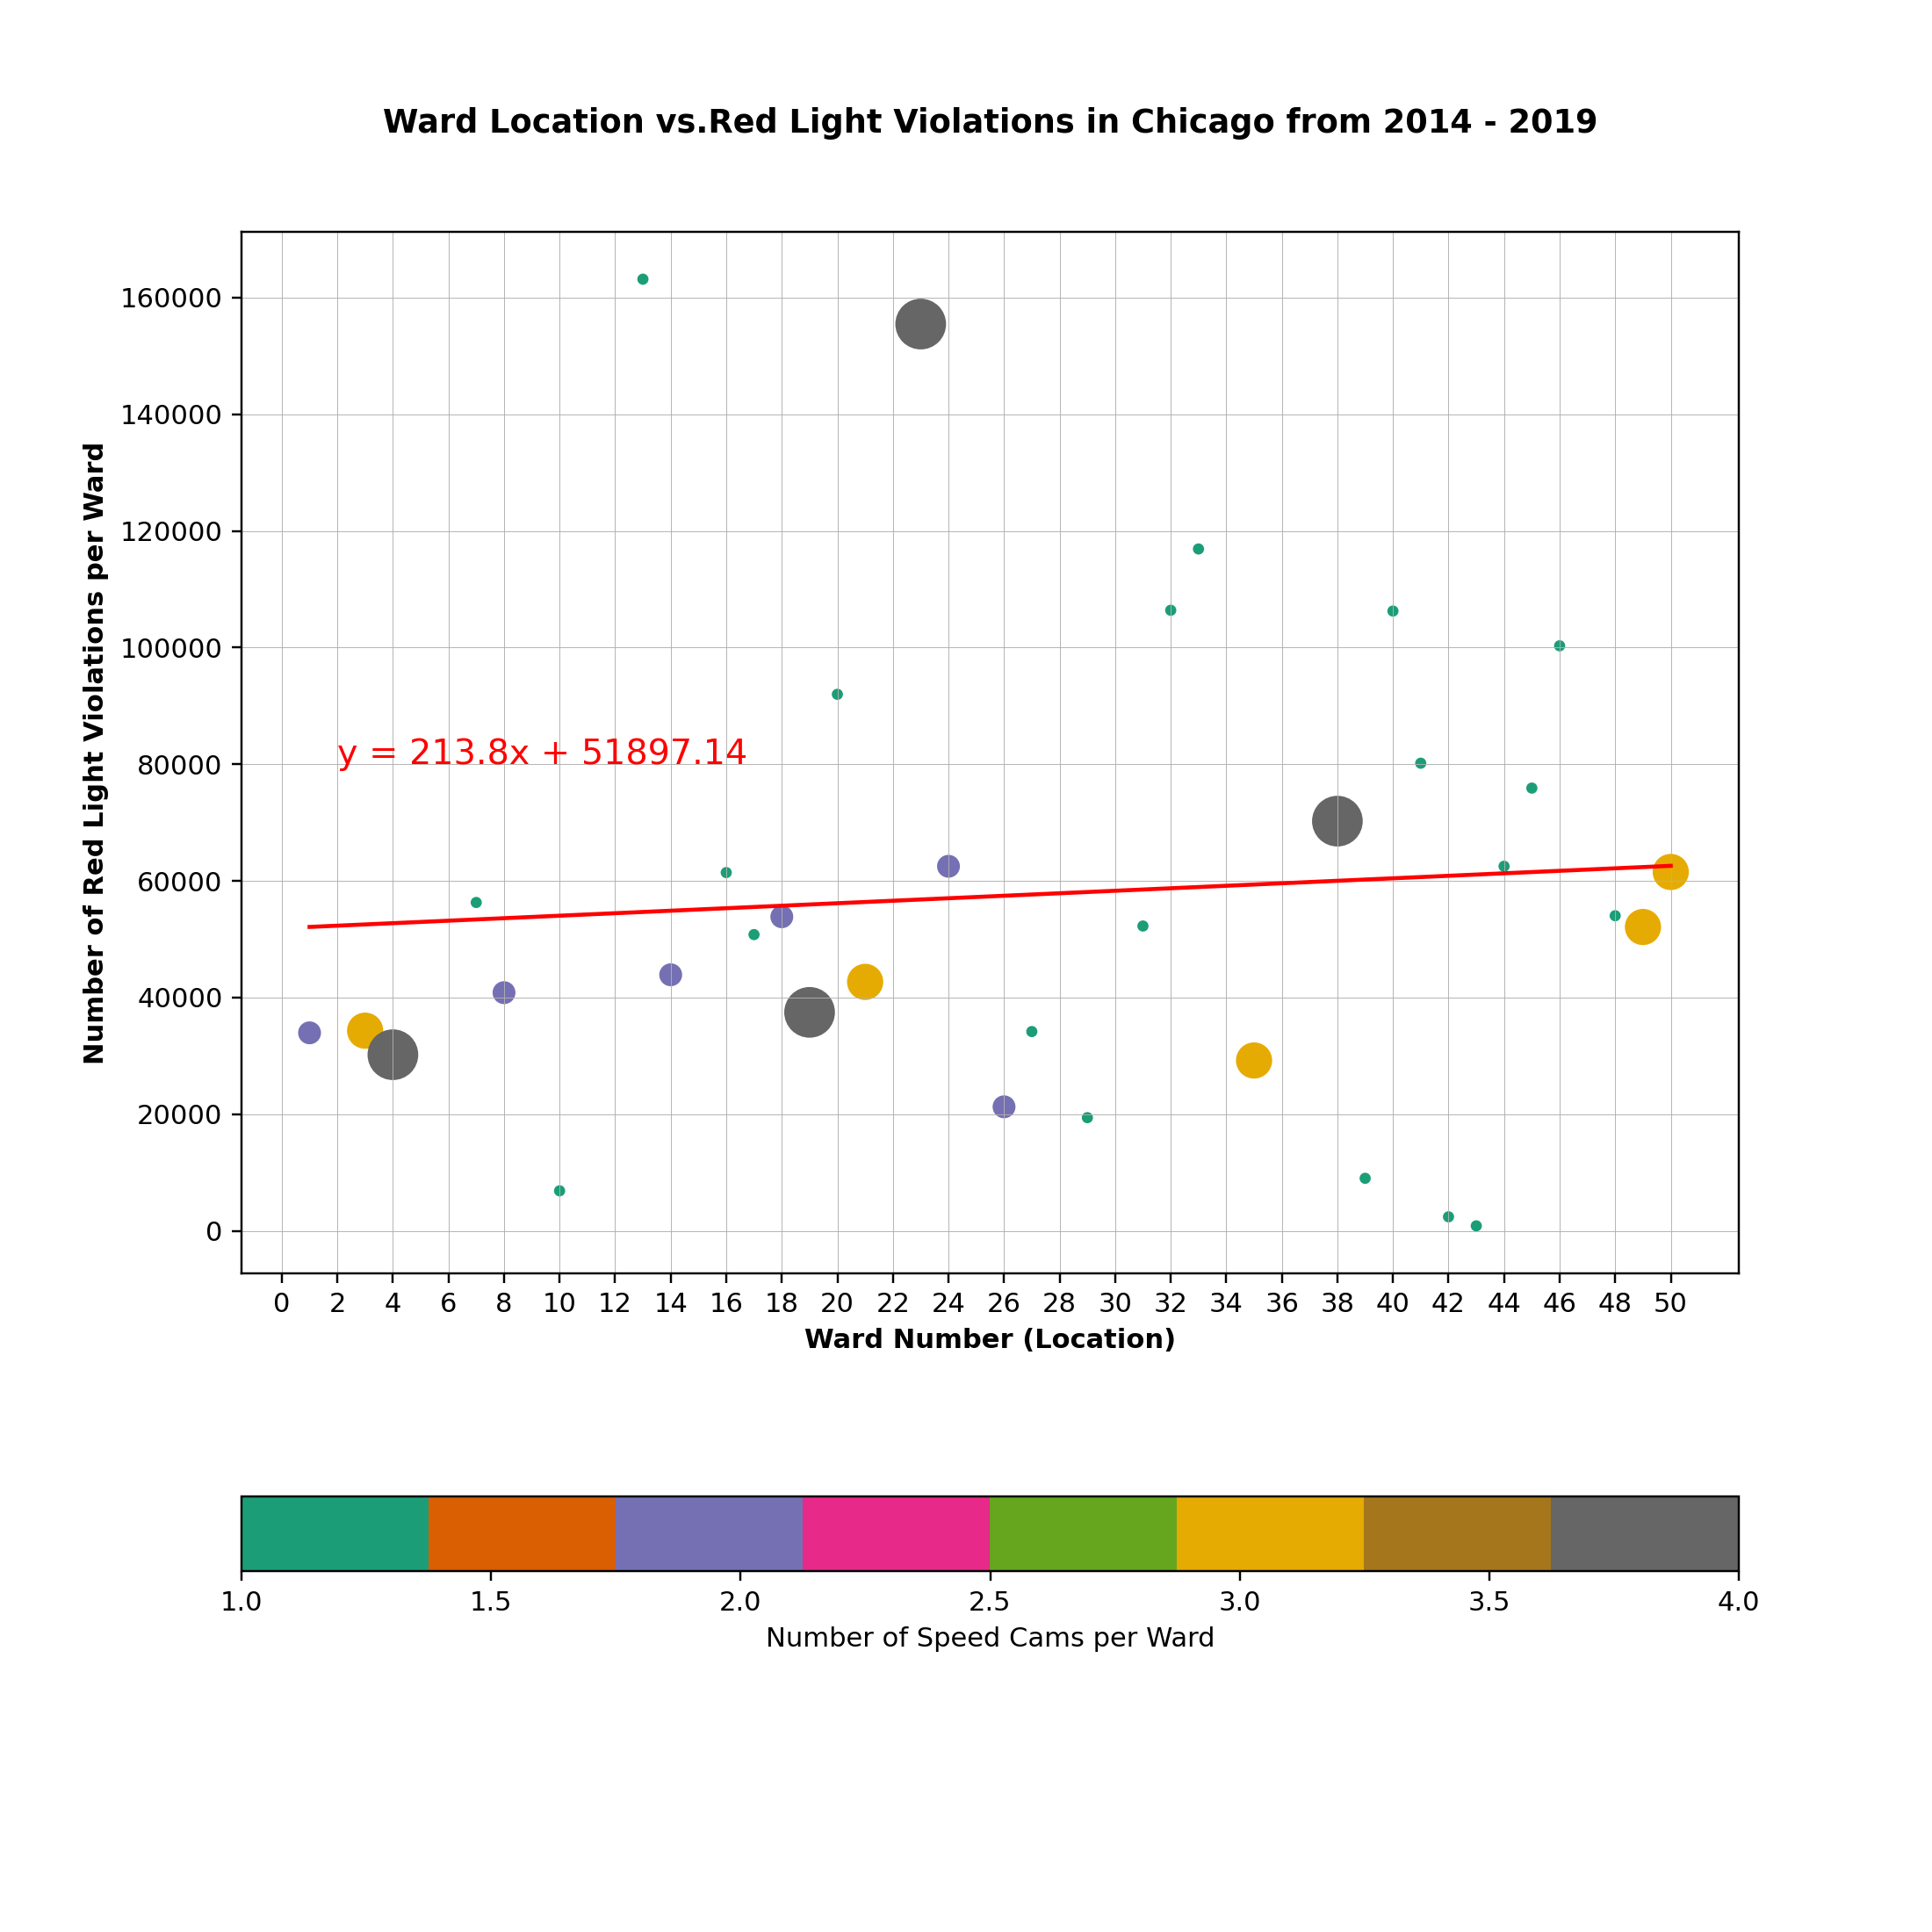

correlation coefficient : 0.08
pvalue: 0.64


In [30]:
weight= 10 * (merge_df["Number of Speed Cams per Ward"]**2.5)
arrangement = merge_df["Number of Speed Cams per Ward"]
cmap='Dark2'
line = to_linear_regress(merge_df["Ward Number"], merge_df["Number of Red Light Violations per Ward"], weight, arrangement, cmap)
to_annotate(line, 2, 80000)
plt.xticks(np.arange(0, 51, 2))
plt.xlabel("Ward Number (Location)", fontweight="bold")
plt.ylabel("Number of Red Light Violations per Ward", fontweight="bold")
plt.title("Ward Location vs.Red Light Violations in Chicago from 2014 - 2019", y=1.08, fontweight="bold")
plt.colorbar(label="Number of Speed Cams per Ward", orientation="horizontal") 
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(linewidth=0.3)
plt.savefig("Images/ward vs. red light violations.png")